<a href="https://colab.research.google.com/github/mdaugherity/Numerical2022/blob/main/intro/Week_2_How_Numbers_are_Stored.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PHYS 351 - Applied Numerical
Fall 2022, Dr. Daugherity

Examples for how computers store numbers.  The moral for today:

**COMPUTERS STORE APPROXIMATE VALUES, NOT EQUATIONS!**


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Warm-up
Make this plot

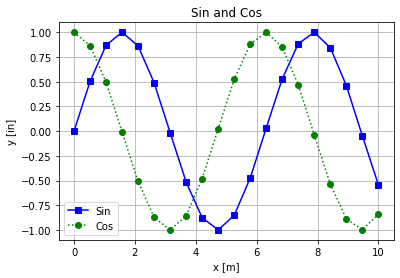

In [ ]:
x = np.linspace(0,10,20)
y1 = np.sin(x)
y2 = np.cos(x)

plt.plot(x,y1,'b-s',label='Sin')
plt.plot(x,y2,'g:o',label='Cos')

plt.title('Sin and Cos')
plt.xlabel('x [m]')
plt.ylabel('y [in]')
plt.grid()

plt.legend()
plt.show()

# The Problem
Math is not exact in a computer!  Why?  Because the computer can only store 64-bit approximations of numbers

In [ ]:
2.6 + 0.6

3.2

In [ ]:
2.6 + 0.2 + 0.2 + 0.2

3.2000000000000006

In [ ]:
(2)**0.5

1.4142135623730951

In [ ]:
(2)**0.5 * (2)**0.5

2.0000000000000004

In [ ]:
(2)**0.5 * (2)**0.5 - 2

4.440892098500626e-16

# Representation
You need to be comfortable with binary (base 2) and hex (base 16).  Python can help.

In [ ]:
bin(26)

'0b11010'

In [ ]:
0b11010

26

In [ ]:
0b0010101011001011010101010110101011010

22974999898

In [ ]:
4*256+11*16+7

1207

In [ ]:
0x4B7

1207

In [ ]:
bin(1207)


'0b10010110111'

In [ ]:
bin(1207)

'0b10010110111'

In [ ]:
2**1023

89884656743115795386465259539451236680898848947115328636715040578866337902750481566354238661203768010560056939935696678829394884407208311246423715319737062188883946712432742638151109800623047059726541476042502884419075341171231440736956555270413618581675255342293149119973622969239858152417678164812112068608

In [ ]:
2**-1023

1.1125369292536007e-308

In [ ]:
float.hex(26.0)

'0x1.a000000000000p+4'

In [ ]:
print( float.hex((2**0.5)  * (2**0.5)) )
print( float.hex(2.0) )

0x1.0000000000001p+1
0x1.0000000000000p+1


# Machine Epsilon
Find the **largest** possible number that we can add to 1 and not change any bits:   
$1 + ϵ = 1$


In [ ]:
1 + 1e-16

1.0

In [ ]:
print( float.hex(1.0))
print( float.hex(1.0 + 1e-10))
print( float.hex(1.0 + 1e-15))
print( float.hex(1.0 + 1e-16))

0x1.0000000000000p+0
0x1.000000006df38p+0
0x1.0000000000005p+0
0x1.0000000000000p+0


In [ ]:
np.finfo(float).eps

2.220446049250313e-16

In [ ]:
np.finfo(float)

finfo(resolution=1e-15, min=-1.7976931348623157e+308, max=1.7976931348623157e+308, dtype=float64)

# Equality
WARNING!  Danger lies below.

In [ ]:
x = 3.2
y = 2.6 + 0.2 + 0.2 + 0.2
if(x==y):
  print("equal")
else:
  print("nope")

nope


In [ ]:
x = 2
y = (2)**0.5 * (2)**0.5
print(x==y)

False


BE VERY CAREFUL in checking if two floating-point numbers are equal!

**NEVER** just check for x==y, instead check that they are close enough
 

In [ ]:
x==y

False

In [ ]:
np.abs(x-y)<1e-12

True

In [ ]:
np.allclose(x,y)   

True

# Sumup vs Sumdown
A nefarious example

In [ ]:
# Sum up vs sum down
N = 1000
sumup = 0
for i in range(1,N):   # make sure to skip zero!
  sumup+=1/i

sumdown = 0
for i in range(N-1,0,-1):  # counts down from N-1 to 1 
  sumdown +=1/i

print(sumup)
print(sumdown)
print(sumup-sumdown)

7.484470860550343
7.484470860550341
1.7763568394002505e-15
